<a href="https://colab.research.google.com/github/samed-java/ml/blob/main/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preprocessing

In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#Probably can`t be finished because of huge amount of data with kaggle hardware, add nrows parameter to run here
#Load Data

cols = [' Bwd Packet Length Std',' PSH Flag Count',' min_seg_size_forward',' Min Packet Length',' ACK Flag Count',' Bwd Packet Length Min',' Fwd IAT Std','Init_Win_bytes_forward',' Flow IAT Max',' Bwd Packets/s',' URG Flag Count','Bwd IAT Total',' Label']
df1=pd.read_csv("/content/drive/MyDrive/cicids2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv", usecols = cols)#,nrows = 50000
df2=pd.read_csv("/content/drive/MyDrive/cicids2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv", usecols = cols)
df3=pd.read_csv("/content/drive/MyDrive/cicids2017/Friday-WorkingHours-Morning.pcap_ISCX.csv", usecols = cols)
df7=pd.read_csv("/content/drive/MyDrive/cicids2017/Monday-WorkingHours.pcap_ISCX.csv", usecols = cols)
df5=pd.read_csv("/content/drive/MyDrive/cicids2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv", usecols = cols)
df6=pd.read_csv("/content/drive/MyDrive/cicids2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv", usecols = cols)
df8=pd.read_csv("/content/drive/MyDrive/cicids2017/Tuesday-WorkingHours.pcap_ISCX.csv", usecols = cols)
df4=pd.read_csv("/content/drive/MyDrive/cicids2017/Wednesday-workingHours.pcap_ISCX.csv", usecols = cols)


# df4, df7 and df8 are being left out as they only have the benign samples

df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8

df.replace([np.inf, -np.inf], np.nan, inplace=True)



# df = df.replace([np.inf, -np.inf], np.nan, inplace=True)
# # df.fillna(999, inplace=True)
df.interpolate(method="linear",inplace=True)

df = df.dropna()
# df = df.interpolate(method="linear",inplace=True)

# dataframe = dataframe.reset_index(drop=True)


data = df.copy()

print(data.shape)

# data= data.sample(n=data.shape[0]//2)


print(data.shape)


# y = data[' Label'].copy()
# X = data.drop([' Label'],axis=1)

(2830743, 13)
(2830743, 13)


In [27]:
# from google.colab import drive
# drive.mount('/content/drive')

1


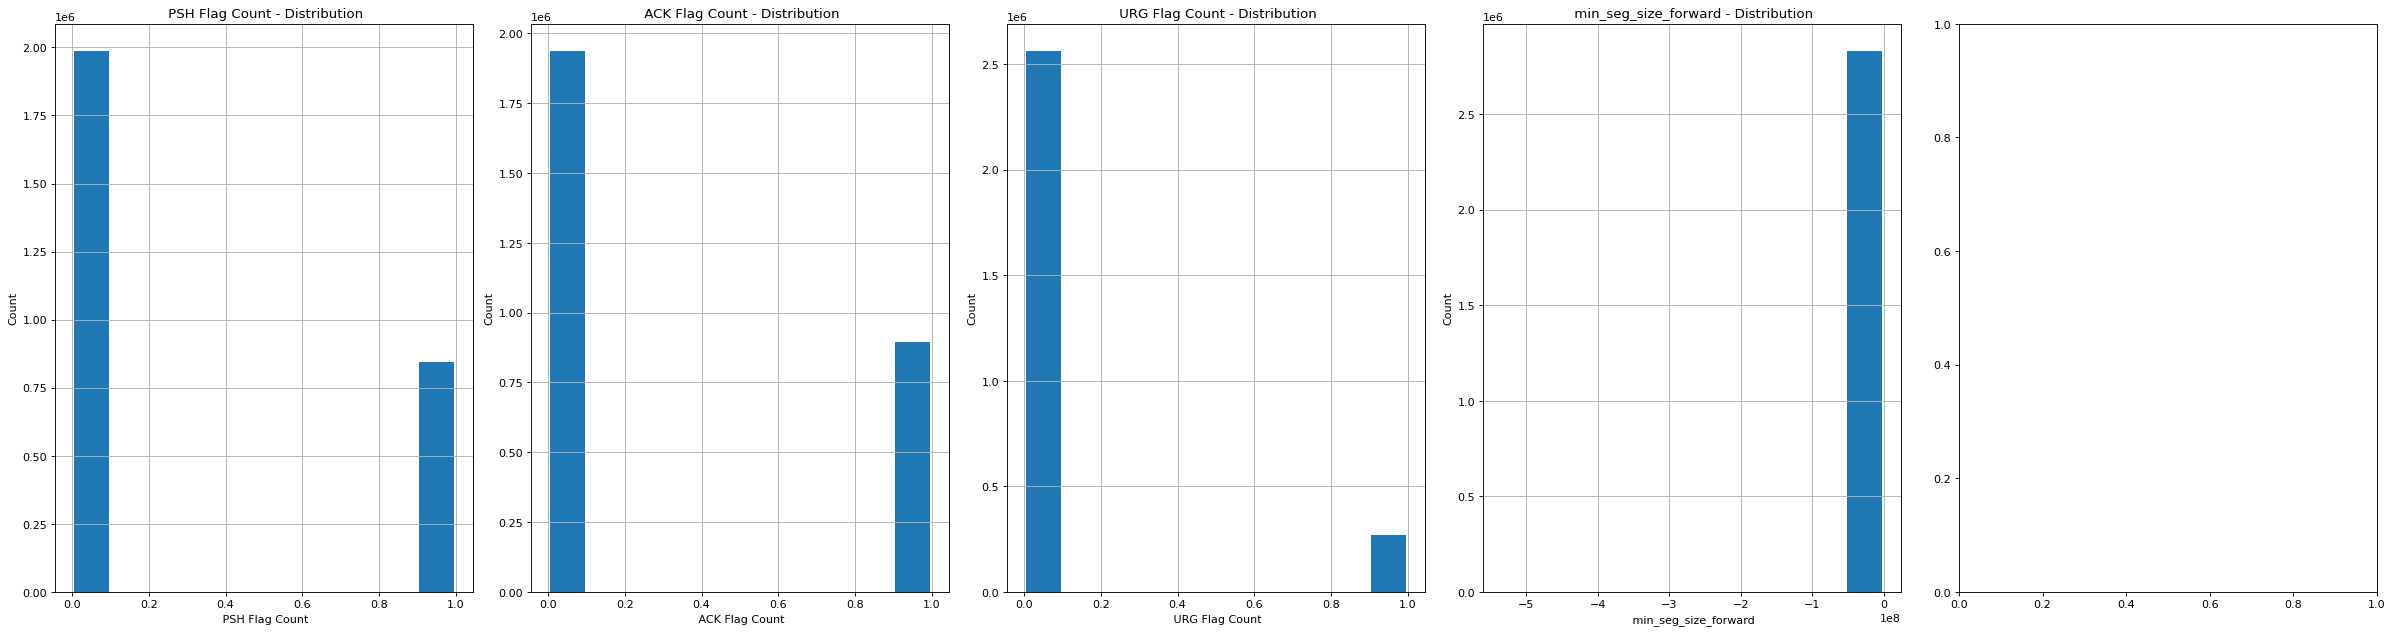

In [28]:
import matplotlib.pyplot as plt

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]  # Sadece belirli sayıda farklı değere sahip sütunları al
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow) # nGraphRow'u tamsayıya dönüştür
    print(nGraphRow)
    figX= 6 * nGraphPerRow
    figY=  8 * nGraphRow
    figSize = (int(figX),int(figY))
    plt.figure(num=None, figsize=figSize, dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            continue  # Sadece sayısal sütunları göster
        columnDf.hist(bins=10, rwidth=0.9)
        plt.xlabel(columnNames[i])
        plt.ylabel('Count')
        plt.title(f'{columnNames[i]} - Distribution')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

plotPerColumnDistribution(data, 79, 5)

In [29]:
#Split dataset on train and test
from sklearn.model_selection import train_test_split
train, test=train_test_split(data,test_size=0.3, random_state=10)

#Exploratory Analysis
# Descriptive statistics
train.describe()
test.describe()

print(train.shape)
print(test.shape)


# Packet Attack Distribution
train[' Label'].value_counts()
test[' Label'].value_counts()

(1981520, 13)
(849223, 13)


 Label
BENIGN                        682182
DoS Hulk                       69017
PortScan                       47841
DDoS                           38346
DoS GoldenEye                   3090
FTP-Patator                     2394
SSH-Patator                     1812
DoS slowloris                   1732
DoS Slowhttptest                1598
Bot                              580
Web Attack � Brute Force         434
Web Attack � XSS                 183
Infiltration                       8
Web Attack � Sql Injection         6
Name: count, dtype: int64

In [30]:
#Scalling numerical attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [31]:
# # importing one hot encoder from sklearn
# from sklearn.preprocessing import OneHotEncoder

# # creating one hot encoder object
# onehotencoder = OneHotEncoder()

trainDep = train[' Label'].values.reshape(-1,1)
# trainDep = onehotencoder.fit_transform(trainDep).toarray()
testDep = test[' Label'].values.reshape(-1,1)
# testDep = onehotencoder.fit_transform(testDep).toarray()

In [32]:
train_X=sc_traindf
train_y=trainDep[:,0]

test_X=sc_testdf
test_y=testDep[:,0]

Isolation Forest Model

In [33]:
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(200)

model = IsolationForest(max_samples=10000, random_state=rng)
model.fit(train_X)
y_pred_train = model.predict(train_X)
y_pred_test = model.predict(test_X)
print(y_pred_test)
print(y_pred_test.shape)

print("percentage of Legit:", (list(y_pred_test).count(1)/y_pred_test.shape[0])*100)
print("percentage of Anomaly:",(list(y_pred_test).count(-1)/y_pred_test.shape[0])*100)

[-1  1 -1 ... -1  1 -1]
(849223,)
percentage of Legit: 60.29817845253837
percentage of Anomaly: 39.70182154746162


In [34]:
np.unique(test_y)

array(['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk',
       'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Infiltration',
       'PortScan', 'SSH-Patator', 'Web Attack � Brute Force',
       'Web Attack � Sql Injection', 'Web Attack � XSS'], dtype=object)

In [35]:
y_true_train= pd.Series(train_y.copy())
y_true= pd.Series(test_y.copy())

attack = ['DDoS', 'PortScan', 'Bot', 'Infiltration', 'Web Attack � Brute Force', 'Web Attack � XSS', 'Web Attack � Sql Injection', 'DoS Hulk', 'DoS Slowhttptest', 'DoS GoldenEye',
       'SSH-Patator', 'FTP-Patator', 'DoS slowloris']
normal = 'BENIGN'
y_true=y_true.replace(attack, -1)
y_true=y_true.replace(normal, 1)
y_true_train=y_true_train.replace(attack, -1)
y_true_train=y_true_train.replace(normal, 1)
y_true.unique()

array([ 1, -1])

In [36]:
print (len(y_true))
y_true.value_counts()

849223


 1    682182
-1    167041
Name: count, dtype: int64

In [37]:
print(len(y_pred_test))
pd.Series(y_pred_test).value_counts()

849223


 1    512066
-1    337157
Name: count, dtype: int64

In [38]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred_test)
tn, fp, fn, tp = cf_matrix.ravel()
cf_matrix

array([[112085,  54956],
       [225072, 457110]])

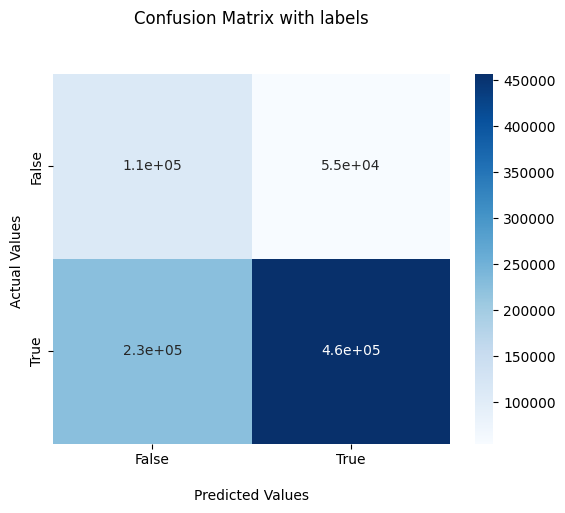

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [40]:
print ("True Negetive", tn,
       "\nTrue Positive", tp)
print ("False Negetive", fn,
       "\nFalse Positive", fp)

True Negetive 112085 
True Positive 457110
False Negetive 225072 
False Positive 54956


In [41]:
recall = tp/(tp+fn)
precision = tp/(tp+fp)
print("Recall", recall, "\nPrecision", precision)

Recall 0.6700704504076624 
Precision 0.8926778969898411


In [42]:
f1 = 2 * (precision*recall)/(precision+recall)
print("F1 Score", f1)

F1 Score 0.7655193896075186


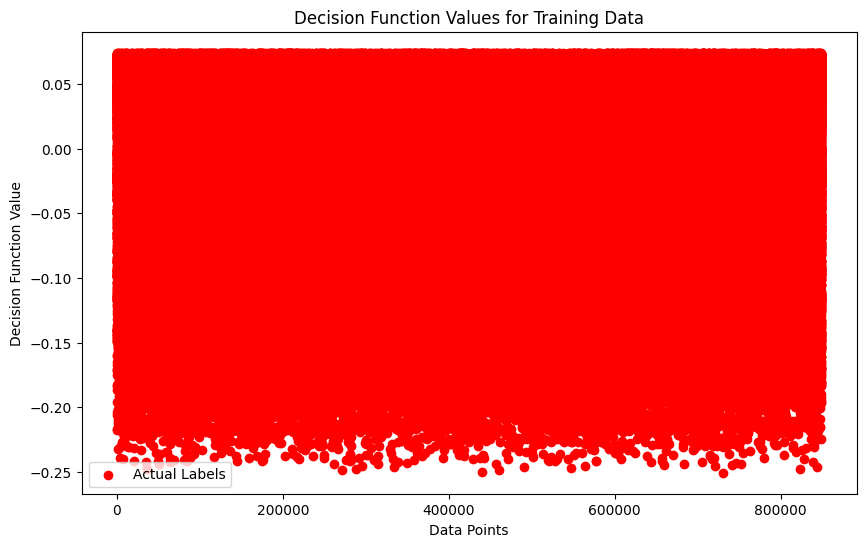

In [43]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Visualize decision function
plt.figure(figsize=(10, 6))

# Decision function for training data
decision_scores_train = model.decision_function(test_X)

# Plot decision function values
plt.scatter(range(len(test_X)), decision_scores_train, c="red", cmap='coolwarm', label='Actual Labels')

plt.xlabel('Data Points')
plt.ylabel('Decision Function Value')
plt.title('Decision Function Values for Training Data')
plt.legend()
plt.show()

In [44]:
# Apply t-SNE for visualization
# tsne = TSNE(n_components=2, random_state=42)
# X_tsne = tsne.fit_transform(test_X)

# # Visualize t-SNE
# plt.figure(figsize=(10, 6))
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c="red", cmap='coolwarm', label='Actual Labels')
# plt.title('t-SNE Visualization of Training Data')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.legend()
# plt.show()

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Compute metrics for training set
# accuracy_train = accuracy_score(y_true_train, y_pred_train)
# precision_train = precision_score(y_true_train, y_pred_train, pos_label=-1)  # Anomalies are labeled as -1
# recall_train = recall_score(y_true_train, y_pred_train, pos_label=-1)
# f1_train = f1_score(y_true_train, y_pred_train, pos_label=-1)

# Compute metrics for testing set
accuracy_test = accuracy_score(y_true, y_pred_test)
precision_test = precision_score(y_true, y_pred_test, pos_label=-1)
recall_test = recall_score(y_true, y_pred_test, pos_label=-1)
f1_test = f1_score(y_true, y_pred_test, pos_label=-1)

# Compute AUC for testing set
# auc_test = roc_auc_score(test_y, -decision_scores_test)  # decision function is negative, so negate it for AUC calculation

# # Print metrics
# print("Training Metrics:")
# print("Accuracy:", accuracy_train)
# print("Precision:", precision_train)
# print("Recall:", recall_train)
# print("F1-score:", f1_train)

print("\nTesting Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)
# print("AUC:", auc_test)


Testing Metrics:
Accuracy: 0.6702538673587503
Precision: 0.33244156283274556
Recall: 0.6710029274250034
F1-score: 0.4446070789650097


**Logistic** Regression

In [46]:
y_true_train= pd.Series(train_y.copy())
y_true= pd.Series(test_y.copy())

attack = ['DDoS', 'PortScan', 'Bot', 'Infiltration', 'Web Attack � Brute Force', 'Web Attack � XSS', 'Web Attack � Sql Injection', 'DoS Hulk', 'DoS Slowhttptest', 'DoS GoldenEye',
       'SSH-Patator', 'FTP-Patator', 'DoS slowloris','Heartbleed']
normal = 'BENIGN'
y_true=y_true.replace(attack, -1)
y_true=y_true.replace(normal, 1)
y_true_train=y_true_train.replace(attack, -1)
y_true_train=y_true_train.replace(normal, 1)
y_true.unique()
y_true_train.unique()

array([-1,  1])

Classification Report:
              precision    recall  f1-score   support

          -1       0.84      0.44      0.58    167041
           1       0.88      0.98      0.93    682182

    accuracy                           0.87    849223
   macro avg       0.86      0.71      0.75    849223
weighted avg       0.87      0.87      0.86    849223


Confusion Matrix:
[[ 73566  93475]
 [ 13770 668412]]


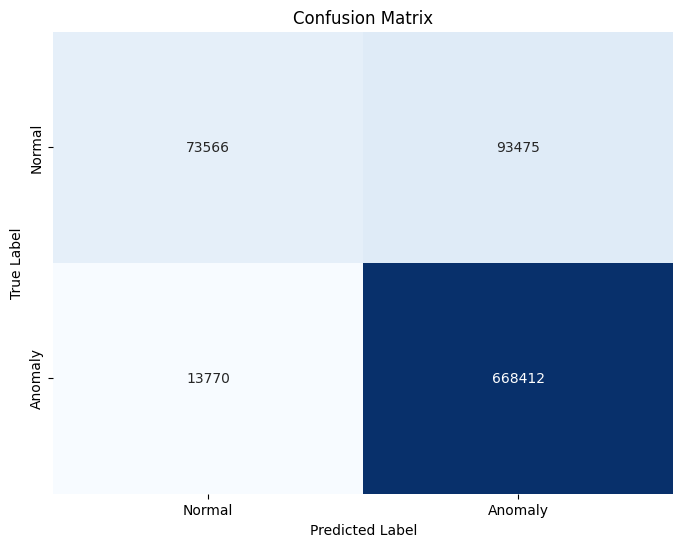

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


# Assuming X_train, X_test, y_train, y_test are your feature and target variables for training and testing
# Split the data into training and testing sets

# Train the logistic regression model
model = LogisticRegression()
model.fit(train_X, y_true_train)

# Make predictions on the testing set
y_pred_train = model.predict(train_X)
y_pred_test = model.predict(test_X)

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_true, y_pred_test))
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_test))

cm = confusion_matrix(y_true=y_true, y_pred=y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [48]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred_test)
tn, fp, fn, tp = cf_matrix.ravel()
cf_matrix

array([[ 73566,  93475],
       [ 13770, 668412]])

In [49]:
print ("True Negetive", tn,
       "\nTrue Positive", tp)
print ("False Negetive", fn,
       "\nFalse Positive", fp)

True Negetive 73566 
True Positive 668412
False Negetive 13770 
False Positive 93475


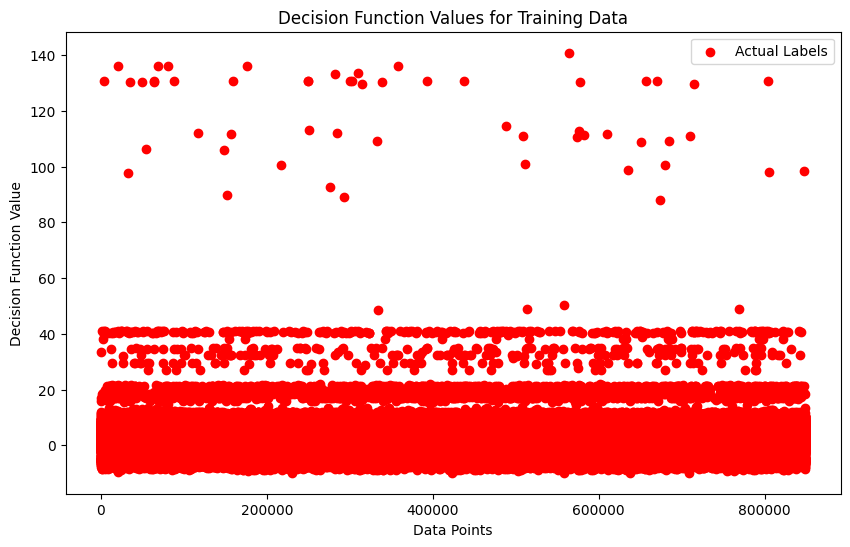

In [50]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Visualize decision function
plt.figure(figsize=(10, 6))

# Decision function for training data
decision_scores_train = model.decision_function(test_X)

# Plot decision function values
plt.scatter(range(len(test_X)), decision_scores_train, c="red", cmap='coolwarm', label='Actual Labels')

plt.xlabel('Data Points')
plt.ylabel('Decision Function Value')
plt.title('Decision Function Values for Training Data')
plt.legend()
plt.show()

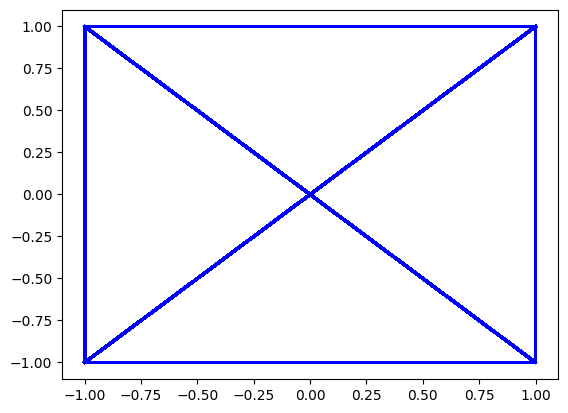

In [51]:
plt.rcParams['agg.path.chunksize'] = 1000
plt.plot(y_true, y_pred_test, color='blue', lw=2, label='')
plt.show()

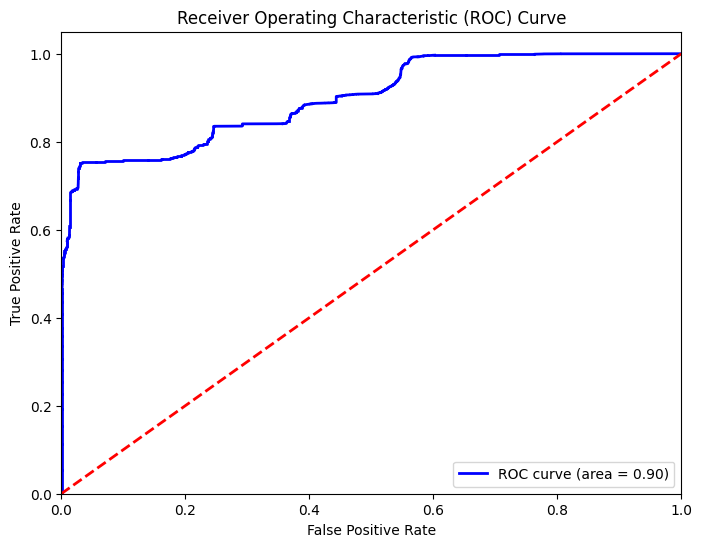

In [52]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (anomaly)
y_prob = model.predict_proba(test_X)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

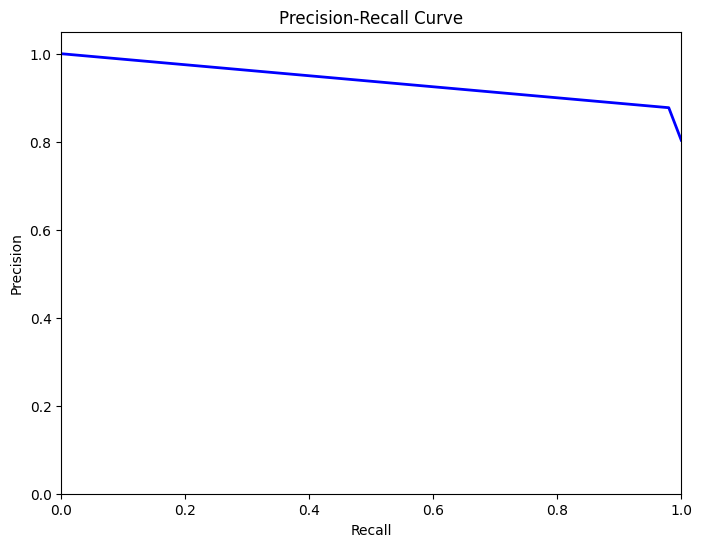

In [53]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_true, y_pred_test)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Compute metrics for training set
# accuracy_train = accuracy_score(y_true_train, y_pred_train)
# precision_train = precision_score(y_true_train, y_pred_train, pos_label=-1)  # Anomalies are labeled as -1
# recall_train = recall_score(y_true_train, y_pred_train, pos_label=-1)
# f1_train = f1_score(y_true_train, y_pred_train, pos_label=-1)

# Compute metrics for testing set
accuracy_test = accuracy_score(y_true, y_pred_test)
precision_test = precision_score(y_true, y_pred_test, pos_label=-1)
recall_test = recall_score(y_true, y_pred_test, pos_label=-1)
f1_test = f1_score(y_true, y_pred_test, pos_label=-1)

# Compute AUC for testing set
# auc_test = roc_auc_score(test_y, -decision_scores_test)  # decision function is negative, so negate it for AUC calculation

# # Print metrics
# print("Training Metrics:")
# print("Accuracy:", accuracy_train)
# print("Precision:", precision_train)
# print("Recall:", recall_train)
# print("F1-score:", f1_train)

print("\nTesting Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)
# print("AUC:", auc_test)


Testing Metrics:
Accuracy: 0.8737139714774564
Precision: 0.8423330585325639
Recall: 0.4404068462233823
F1-score: 0.5784013491785814




```
# This is formatted as code
```

Random forest classifier model

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

# Assuming X_train, X_test, y_train, y_test are your feature and target variables for training and testing
# Train the SVM model
rfm = RandomForestClassifier(n_estimators=100, random_state=42)
rfm.fit(train_X, y_true_train)

# Make predictions on the testing set
y_pred_train = rfm.predict(train_X)
y_pred_test = rfm.predict(test_X)


# Generate a classification report
print("Classification Report: Train data")
print(classification_report(y_true_train, y_pred_train))
print("Classification Report: Test data")
print(classification_report(y_true, y_pred_test))

Classification Report: Train data
              precision    recall  f1-score   support

          -1       0.97      0.99      0.98    390605
           1       1.00      0.99      1.00   1590915

    accuracy                           0.99   1981520
   macro avg       0.99      0.99      0.99   1981520
weighted avg       0.99      0.99      0.99   1981520

Classification Report: Test data
              precision    recall  f1-score   support

          -1       1.00      0.43      0.60    167041
           1       0.88      1.00      0.93    682182

    accuracy                           0.89    849223
   macro avg       0.94      0.71      0.77    849223
weighted avg       0.90      0.89      0.87    849223



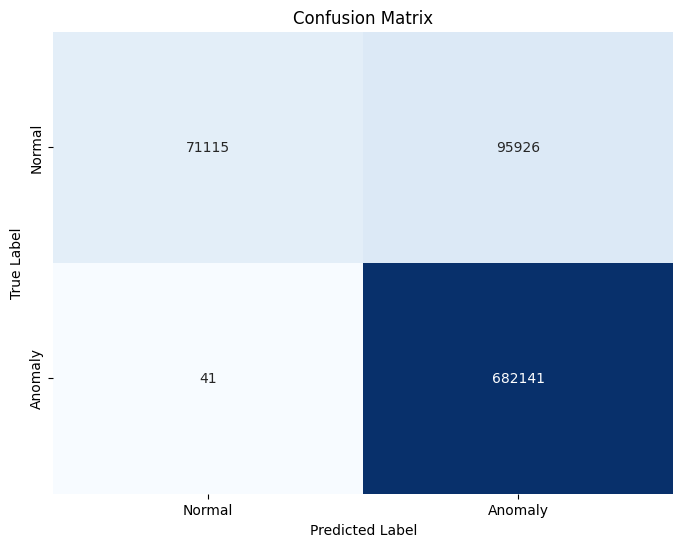

In [56]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [57]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred_test)
tn, fp, fn, tp = cf_matrix.ravel()
cf_matrix

array([[ 71115,  95926],
       [    41, 682141]])

In [58]:
print ("True Negetive", tn,
       "\nTrue Positive", tp)
print ("False Negetive", fn,
       "\nFalse Positive", fp)

True Negetive 71115 
True Positive 682141
False Negetive 41 
False Positive 95926


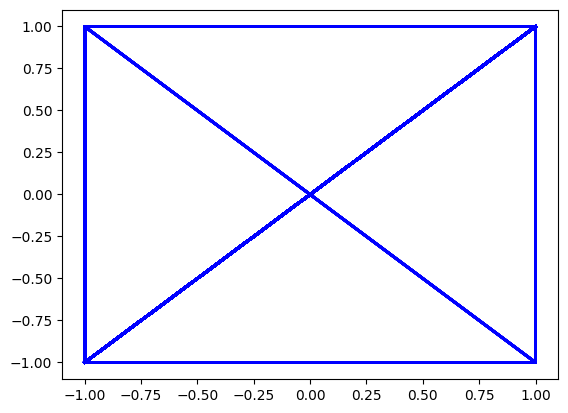

In [59]:
plt.plot(y_true, y_pred_test, color='blue', lw=2, label='')
plt.show()

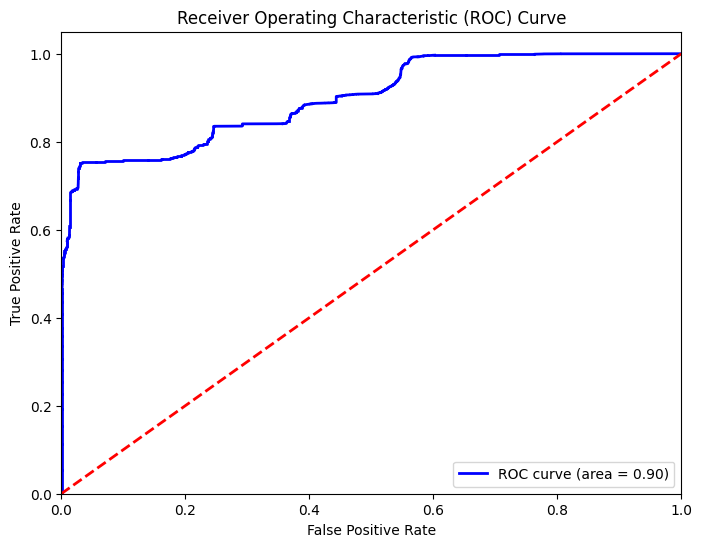

In [60]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (anomaly)
y_prob = model.predict_proba(test_X)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

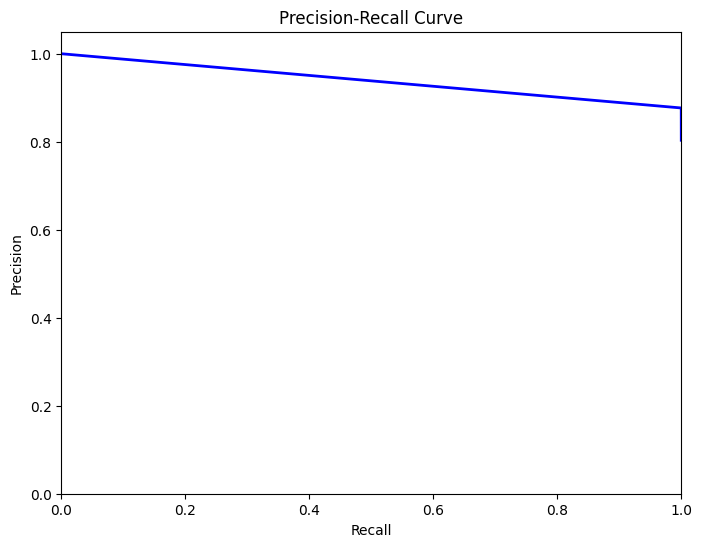

In [61]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_true, y_pred_test)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

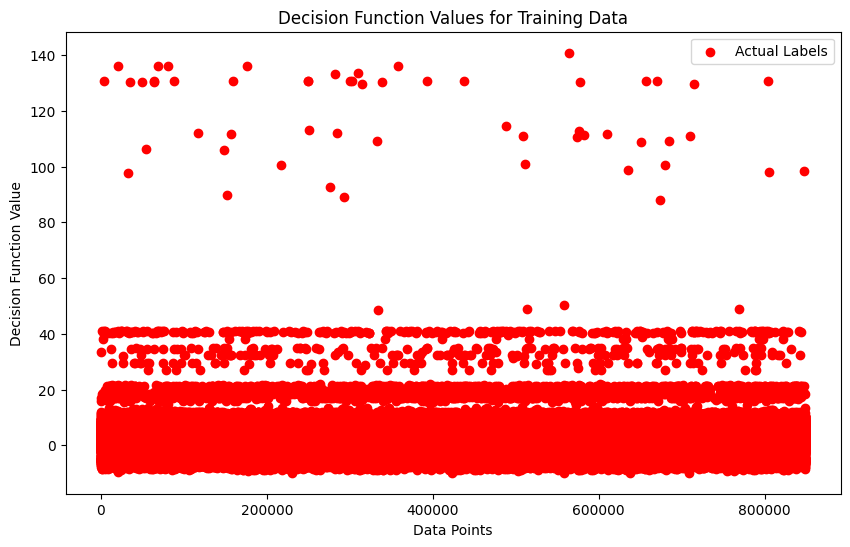

In [62]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Visualize decision function
plt.figure(figsize=(10, 6))

# Decision function for training data
decision_scores_train = model.decision_function(test_X)

# Plot decision function values
plt.scatter(range(len(test_X)), decision_scores_train, c="red", cmap='coolwarm', label='Actual Labels')

plt.xlabel('Data Points')
plt.ylabel('Decision Function Value')
plt.title('Decision Function Values for Training Data')
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Compute metrics for training set
accuracy_train = accuracy_score(y_true_train, y_pred_train)
precision_train = precision_score(y_true_train, y_pred_train, pos_label=-1)  # Anomalies are labeled as -1
recall_train = recall_score(y_true_train, y_pred_train, pos_label=-1)
f1_train = f1_score(y_true_train, y_pred_train, pos_label=-1)

# Compute metrics for testing set
accuracy_test = accuracy_score(y_true, y_pred_test)
precision_test = precision_score(y_true, y_pred_test, pos_label=-1)
recall_test = recall_score(y_true, y_pred_test, pos_label=-1)
f1_test = f1_score(y_true, y_pred_test, pos_label=-1)

# Compute AUC for testing set
# auc_test = roc_auc_score(test_y, -decision_scores_test)  # decision function is negative, so negate it for AUC calculation

# # Print metrics
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_train)

print("\nTesting Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)
# print("AUC:", auc_test)

Training Metrics:
Accuracy: 0.9932531591909242
Precision: 0.9728453246427676
Recall: 0.9935049474533096
F1-score: 0.9830666050246674

Testing Metrics:
Accuracy: 0.8869943465968303
Precision: 0.9994238012254765
Recall: 0.4257338018809753
F1-score: 0.5971107948462826
